# 👋🛳️ Ahoy, welcome to Kaggle! You’re in the right place.

https://www.kaggle.com/competitions/titanic/data

    This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

    The competition is simple: use machine learning to create a model that predicts which passengers Survived the Titanic shipwreck.

    Read on or watch the video below to explore more details. Once you’re ready to start competing, click on the "Join Competition button to create an account and gain access to the competition data. Then check out Alexis Cook’s Titanic Tutorial that walks you through step by step how to make your first submission!

## The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## What Data Will I Use in This Competition?

In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled <code>train.csv</code> and the other is titled <code>test.csv</code>.

- <code>train.csv</code> will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they Survived or not, also known as the “ground truth”.

- <code>test.csv</code> dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the <code>train.csv</code> data, predict whether the other 418 passengers on board (found in <code>test.csv</code>) survived.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

## Submission File Format:

You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond <code>PassengerId</code> and <code>Survived</code>) or rows.

The file should have exactly 2 columns:

- <code>PassengerId</code> (sorted in any order)
- <code>Survived</code> (contains your binary predictions: 1 for Survived, 0 for deceased)


## The analysis starts below the image
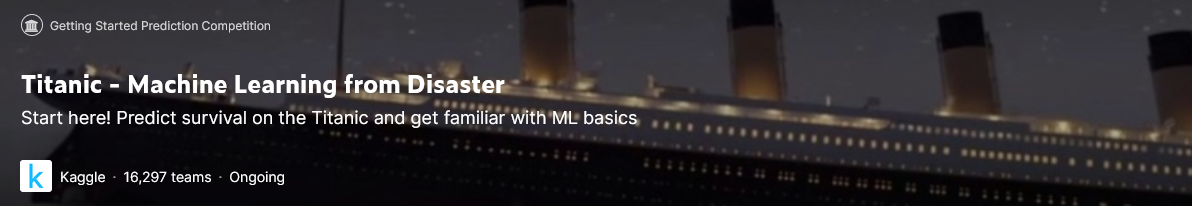

In [102]:
# Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib widget
%matplotlib inline

# Setting a number of columns to display

pd.set_option('display.max_columns', None)   # Set to None to display all columns
pd.set_option('display.width', 1000)         # Set width to a high value to display columns next to each other

# Loading the datasets

train = pd.read_csv('datasets/train.csv')
test = pd.read_csv('datasets/test.csv')
gender_submission = pd.read_csv('datasets/gender_submission.csv')

## EDA, datasets exploration and cleaning

In [103]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Innitial remarks on the variables:
<table>
  <tbody>
    <tr>
      <th>Variable</th>
      <th>Remarks</th>
    </tr>
    <tr>
      <td>PassengerId</td>
      <td>Unique identifier of each passenger, looks to be useless</td>
    </tr>
    <tr>
      <td>Survived</td>
      <td>Target variable</td>
    </tr>
    <tr>
      <td>Pclass</td>
      <td>Class of passenger</td>
    </tr>
    <tr>
      <td>Name</td>
      <td>Unique name of each passenger: contains titles - may be used for feature engineering</td>
    </tr>
    <tr>
      <td>Sex</td>
      <td>Sex of passenger</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Age of passenger</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>...</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>...</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Unique identifier of each ticket, looks to be useless</td>
    </tr>
    <tr>
      <td>Fare</td>
      <td>The cost of a ticket</td>
    </tr>
    <tr>
      <td>Cabin</td>
      <td>The cabin of each passenger - first letter is probably the floor number - may be used for feature engineering</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Implies where the traveler mounted from (Southampton, Cherbourg, and Queenstown)</td>
    </tr>
  </tbody>
</table>


## EDA

### Let's use the tarain dataset to plot some relationships of target vs. other variables to see what's significant

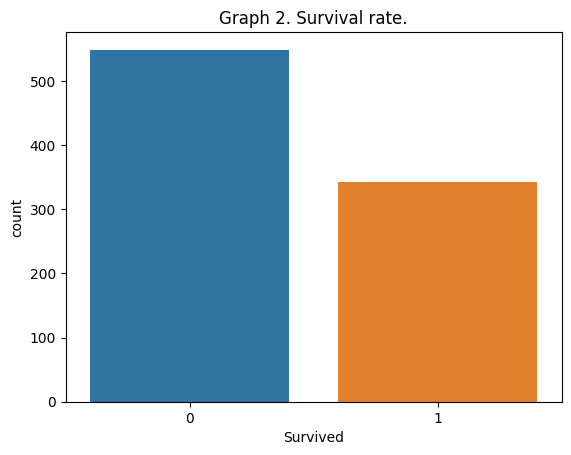

In [104]:
sns.countplot(x='Survived', data=train, label='Survived').set_title('Graph 2. Survival rate.')
plt.show()

Wow, I didn't expect that many people survived.

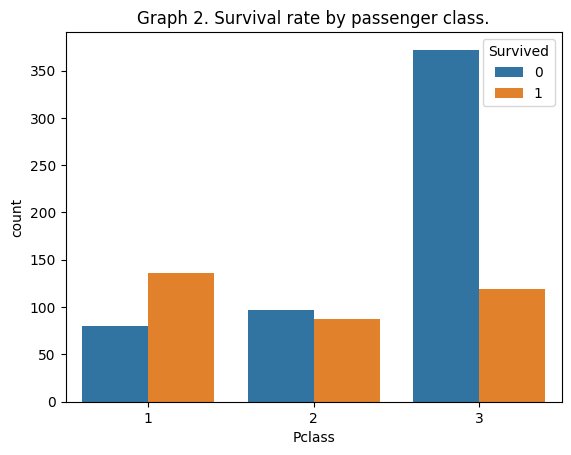

In [105]:
sns.countplot(x='Pclass', hue='Survived', data=train).set_title('Graph 2. Survival rate by passenger class.')
plt.show()

It appears that the third class passengers were most likely to die. At the same time the third class is the most numerous.

The first class passengers were most likely to survive.

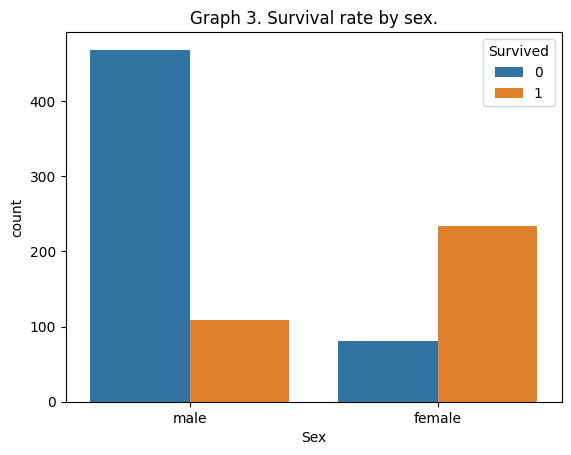

In [106]:
sns.countplot(x='Sex', hue='Survived', data=train).set_title('Graph 3. Survival rate by sex.')
plt.show()

Evidently the females were most likely to survive.

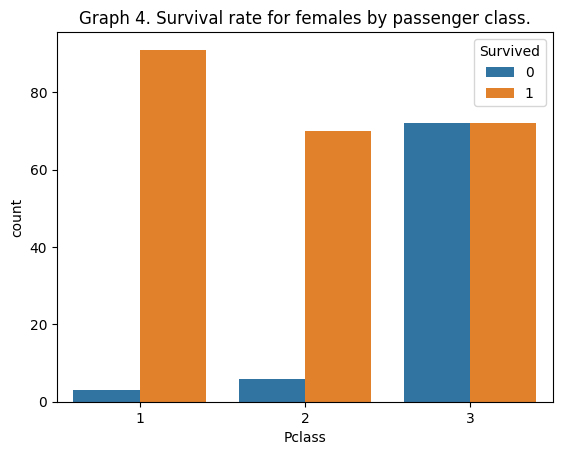

In [107]:
females = train[train['Sex'] == 'female']
sns.countplot(data=females, x='Pclass', hue='Survived').set_title('Graph 4. Survival rate for females by passenger class.')
plt.show()

First and second class female passangers were very likely to survive, whereas in the third class the proportion is 50/50.

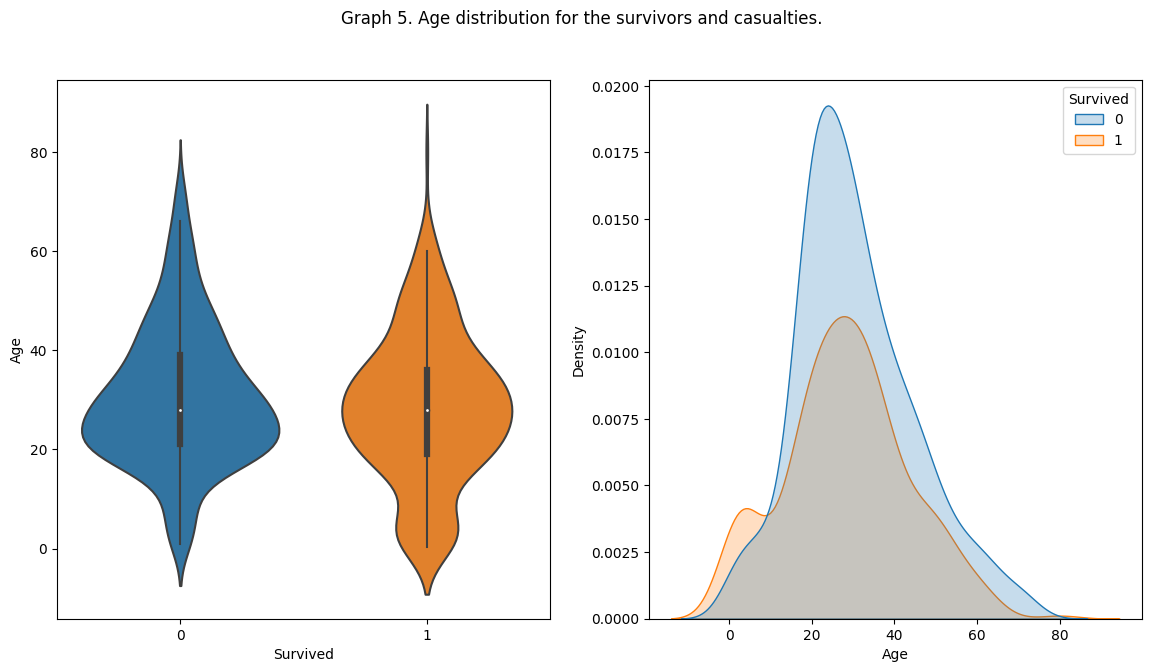

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.violinplot(data=train, x='Survived', y='Age', split=True, ax=ax[0])
sns.kdeplot(x='Age', hue='Survived', data=train, fill=True, ax=ax[1])
plt.suptitle('Graph 5. Age distribution for the survivors and casualties.')
plt.show()

In [109]:
train_na = train.isna().sum()
test_na = test.isna().sum()
combined_na = pd.concat([train_na, test_na], axis=1)
new_column_names = ['train_na_count', 'test_na_count']

combined_na = combined_na.rename(columns={0: new_column_names[0], 1: new_column_names[1]})
combined_na

,train_na_count,test_na_count
PassengerId,0,0.0
Survived,0,NaN
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,86.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,1.0


# Cleaning <code>train</code> and <code>test</code>

From the table above we see that for both <code>train</code> and <code>test</code> datasets we can clean and process variables 'Age' and 'Cabin' equally. The missing values in the rest of variables are filled/imputed separately. 'Name' variable is treated in the last step, where we use feature engineering to create new features based on martial status.
1. For 'Age' it is best to impute the mean of some other variable that is correlated with it (<code>train</code> and <code>test</code> datasets).
2. Feature engineering is performed on 'Cabin' to extract new data because the first letter seems to be the floor number (<code>train</code> and <code>test</code> datasets).
3. For 'Embarked' we will replace the NaNs with 'Unknown' (<code>train</code> dataset).
4. For 'Fare' it is best to impute the mean of some other variable that is correlated with it (<code>test</code> dataset).
5. Feature engineering is performed on 'Name'. I will extract the martial status (<code>train</code> and <code>test</code> datasets).

### 1. Imputing the mean - 'Age' - <code>both datasets</code>
Let's start with step 1 by seeing what variable has the strongest correlation to 'Age'.

In [110]:
# Correlation in absolute values
train.corr()['Age'].transform('abs').sort_values(ascending=False) 

Age            1.000000
Pclass         0.369226
SibSp          0.308247
Parch          0.189119
Fare           0.096067
Survived       0.077221
PassengerId    0.036847
Name: Age, dtype: float64

'Pclass' has the strongest correlation to 'Age'. We will now calculate the mean age for each 'Pclass' and impute it by passanger class. 

In [111]:
mean_age_by_class_train = train.groupby('Pclass')['Age'].agg({'mean'})
mean_age_by_class_train

,mean
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [112]:
for dataframe in (train, test):
    for ticket_class, mean in zip([1,2,3], [38, 30, 25]):
        class_group = dataframe.groupby('Pclass')['Age'].groups[ticket_class]
        dataframe.loc[class_group, 'Age'] = dataframe.loc[class_group, 'Age'].fillna(mean)
    print(dataframe['Age'].isnull().sum())

0
0


### 2. Feature engineering - 'Cabin' - <code>both datasets</code>

- The first letter represents the floor of the titanic ship.
- The rest is the room number.
    - The idea is to split the two and disregard the room number. 
        1. First, I replace NaN wih letter 'U'.
        2. Second, I use list comprehension to replace the full 'Cabin' code with the first letter
        3. Last, U is replaced with 'Unknown' 

In [113]:
for dataframe in (train, test):
    # strip first letter from cabin number if there; because letters inform us about the floors
    dataframe['Cabin'] = dataframe['Cabin'].replace(np.NaN, 'U')      # replacing empty with letter U
    dataframe['Cabin'] = [ln[0] for ln in dataframe['Cabin']]         # list comprehension to get the first index
    dataframe['Cabin'] = dataframe['Cabin'].replace('U', 'Unknown')

    print(dataframe['Cabin'].isna().sum())

0
0


### 3. Cleaning - 'Embarked' - <code>train</code> dataset
- For 'Embarked' we will replace the NaNs with 'Unknown'

In [114]:
# Replacing NaN with 'Unknown' for 'Embarked'
train['Embarked'] = train['Embarked'].replace(np.NaN, 'Unknown')

### 4. Imputing the mean - 'Fare' - <code>test</code> dataset 

In [115]:
# Preparing boolean array with missing value(s) for later 
na_fare = test['Fare'].isna()
na_fare

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Fare, Length: 418, dtype: bool

Similarly to what was done for imputing 'Age' I will check what variable has the strongest correlation with 'Fare' in test dataset

In [116]:
test.corr()['Fare'].transform('abs').sort_values(ascending=False) 

Fare           1.000000
Pclass         0.577147
Age            0.350422
Parch          0.230046
SibSp          0.171539
PassengerId    0.008211
Name: Fare, dtype: float64

Pclass has the strongest corr with 'Fare', and the Pclass is 3 so I will use the mean or median of 3rd class to impute the NaN fare here

In [117]:
mean_fare_by_class_test = test.groupby('Pclass')['Fare'].agg({'mean','median'})
mean_fare_by_class_test

,mean,median
Pclass,,
1,94.280297,60.0000
2,22.202104,15.7500
3,12.459678,7.8958


It appears that median is a better aggregate funcion for the purpose of imputing the missing value.
- Fare amount is usually the same if bought in a specific place in a specific time 

In [118]:
test.loc[na_fare,'Fare'] = 7.8958
test.loc[152,:]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                     Unknown
Embarked                        S
Name: 152, dtype: object

### 5. Feature engineering - 'Name' - <code>both datasets</code>

- First let's get the prefix from the 'Name' column

In [119]:
test['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

- It appears that the prefix (Mr., Mrs., Dona, Mr., Master.,...) are located between the first comma and period.

In [125]:
import re
for x in (train, test):
# Extract text between comma and dot using regex
    x['Prefix'] = x['Name'].apply(lambda x: re.search(r',\s(.*?)\.', x).group(1))
    x['Prefix'].str.strip()

In [126]:
train['Prefix'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Prefix, dtype: int64

#### Variables not needed for the model:
- <code>PassengerId</code> (unique ID for each passenger)
- <code>Ticket</code> (unique ticket ID for each passenger)

#### Target variable:
- <code>Survived</code>